In [3]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

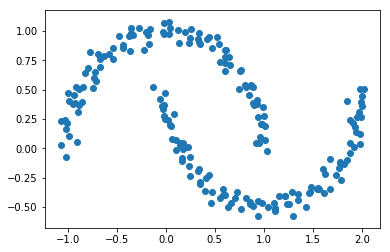

In [4]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)

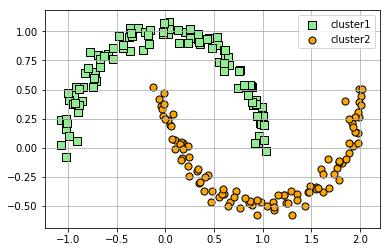

In [9]:
plt.scatter(X[y_db==0,0],
               X[y_db==0,1],
               s=50,c='lightgreen',
           marker='s',edgecolors='black',
           label='cluster1')
plt.scatter(X[y_db==1,0],
               X[y_db==1,1],
               s=50,c='orange',
           marker='o',edgecolors='black',
           label='cluster2')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

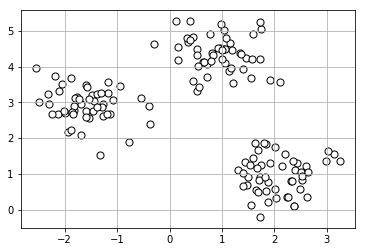

In [10]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=150,
              n_features=2,
              centers=3,
              cluster_std=0.5,
              random_state=0)
plt.scatter(X[:,0],X[:,1],
           c='white',marker='o',edgecolors='black',s=50)
plt.grid()
plt.show()

In [20]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
         init='random',
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=0)
y_km=km.fit_predict(X)

In [22]:
print("Distortion: %.2f" % km.inertia_)
#群內誤差平方和

Distortion: 72.48


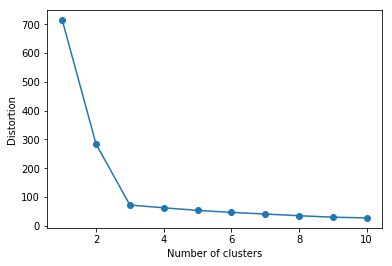

In [24]:
distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             max_iter=300,
             random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()
#發生轉折時，即為最佳群落數目
#這裡為3